# Play around with Ridge and Lasso Regression
The purpose of this notebook is to play around with the Ridge and Lasso regression using course material. At the end, we will look at the relationship between change of alpha values and R squared values for both regression. 

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import warnings
%matplotlib inline
sns.set_style('white')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

## Codes from course material.

In [0]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [0]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.4500625793011847

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897085

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [0]:
#@title
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914474


## Codes that explore changes of alpha value vs. R squared value. 

In [0]:
# Create a lost of alpha values, starting from 0.001, increase by 0.001, and stop at 0.8
alpha_lasso = list(np.arange(0.001,0.8,0.001))
Lasso_R_train = list()
Lasso_R_test = list()

In [0]:
# Loop through all alpha values, and store their corresponding R squared value for the training data set and test data set. 
for value in alpha_lasso:
  lass_loop = linear_model.Lasso(alpha=value)
  lassfit_loop = lass_loop.fit(X_train2, Y_train)
  Lasso_R_train.append(lass_loop.score(X_train2, Y_train))
  Lasso_R_test.append(lass_loop.score(X_test2, Y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

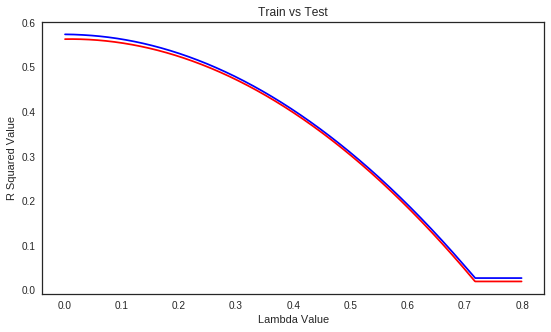

In [0]:
plt.figure(figsize=(9,5))
plt.plot(alpha_list, Lasso_R_train, 'b')
plt.plot(alpha_list, Lasso_R_test, 'r')
plt.xlabel("Lambda Value")
plt.ylabel("R Squared Value")
plt.title("Train vs Test")
plt.show()

From above graphic, we can see the R squared value for traing set and testing set follow a very similar pattern, and both R squared values are similar as well. As the aplpha value increases, the R squared value decrease. Once the alpha value passed 0.7, the R squared value will be consistent. 

In [0]:
# Create a lost of alpha values, starting from 0, increase by 10, and stop at 100000
alpha_ridge = range(0,100000,10)
Ridge_R_train = list()
Ridge_R_test = list()

# Loop through all alpha values, and store their corresponding R squared value for the training data set and test data set. 
for value in alpha_ridge:
  ridgeregr = linear_model.Ridge(alpha=value, fit_intercept=False)
  ridgeregr.fit(X_train2, Y_train)
  Ridge_R_train.append(ridgeregr.score(X_train2, Y_train))
  Ridge_R_test.append(ridgeregr.score(X_test2, Y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.851748e-23
  overwrite_a=True).T


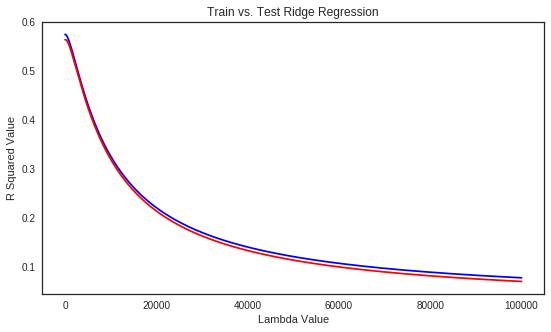

In [0]:
plt.figure(figsize=(9,5))
plt.plot(alpha_ridge, Ridge_R_train, 'b')
plt.plot(alpha_ridge, Ridge_R_test, 'r')
plt.xlabel("Lambda Value")
plt.ylabel("R Squared Value")
plt.title("Train vs. Test Ridge Regression")
plt.show()

From above graphic, we can see that R squared values for training set and testing set follow the same pattern. The R squared values for both data sets are similar as well. The pattern here shows that alpha value increases and R squared value decreases. However, as alpha value increases, the change of R squared value will be flattern. 